Домашнее задание
Рассмотрим граф $G=(V,E)$, вершинам которого случайным образом приписаны значения 0 и 1 так, что смежные вершины не могут одновременно иметь значение 1. Пример расстановки значений по вершинам графа показан на картинке ниже (черные вершины имеют значение 1, белые - 0):

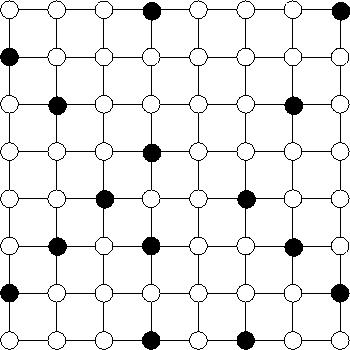

Как оценить, сколько в среднем закрашенных вершин будет иметь такой граф?

Сформулируем задачу в математических терминах.

Пусть $\xi \in \{0,1\}^{V}$ обозначает конфигурацию графа (расстановку 0 и 1 по вершинам). Назовем конфигурацию допустимой, если вершины, соединенные ребрами, не имеют одновременно значения 1. Пусть $Z_G$ - общее количество допустимых конфигураций. Зададим распределение на множестве всех конфигураций: $$\begin{equation*} \mu(\xi) = \begin{cases} \frac{1}{Z_G}, &\text{$\xi$ - допустимая конфигурация}\\ 0, &\text{иначе.} \end{cases} \end{equation*}$$ Обозначим $n(\xi)$ - число закрашенных вершин в конфигурации $\xi$. Тогда $$ {\rm E} n(\xi) = \sum\limits_{x \in \{0,1\}^V} n(x) \mu(x) = \frac{1}{Z_G} \sum\limits_{x \in \{0,1\}^V} n(x) {\rm I}_{\{x - \text{допустимая} \}} $$

Явно перебирать все $x \in \{0,1\}^{V}$ не представляется возможным. Мы могли бы попробовать оценить ${\rm E} n(\xi)$, используя закон больших чилел: $$ {\rm E} n(\xi) \approx \frac{1}{N} \sum\limits_{i=1}^{N} n(\xi), \text{где $\xi \sim \mu$} $$ Но есть проблема: как смоделировать случайную величину из распределения $\mu$?

В этом нам поможет метод MCMC.

## Задание

* Оценить  ${\rm E} n(\xi)$ с помощью МСМС для графа 8х8
* Обосновать численно и графически стационарность
* Построить график распределеиня $n(\xi)$
* Изобразить раскраску для одного из случайных графов, взятых из стационарного распределения.
* Дополнительная: построить график зависимости ${\rm E} n(\xi)$ от N - размера графа (NxN). Что можно сказать о скорости роста ${\rm E} n(\xi)$ как функции от N?

## Литература

*  http://probability.ca/jeff/ftpdir/johannes.pdf
* http://nitro.biosci.arizona.edu/courses/EEB596/handouts/Gibbs.pdf


In [12]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [0]
    for i in range(niter):
        p = value(current, **kwargs)
        index = np.random.choice(8,2)
        proposed = proposal(current, index, **kwargs)
        p /= value(proposed, **kwargs)
        if np.random.uniform() > p:
            current = proposed
        else:
            current[index[0]][index[1]] = 0;
        post.append(int(np.sum(current)))
    plot_graph(current.astype('bool'))
    return post[nburn:]

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def plot_graph(g):
    colors = np.empty(g.shape, dtype='U5')
    colors[:] = 'white'
    colors[g] = 'black'
    x, y = np.indices((g.shape))
    plt.scatter(x, y, facecolors = colors.ravel(), edgecolors = 'black')
    plt.show()

In [8]:
def value(current, **kwargs):
    _ = kwargs
    return current.sum()

In [49]:
def proposal(current, place, **kwargs):
    _ = kwargs
    place = np.random.choice(8, 2)
    n_neighbours = 0
    for i in range(2):
        if place[i] != 0: n_neighbours += current[place[0] + i - 1][place[1] - i]
        if place[i] != 7: n_neighbours += current[place[0] - i + 1][place[1] + i]
    if n_neighbours == 0: current[place[0]][place[1]] = 1
    else: current[place[0]][place[1]] = 0
    return current


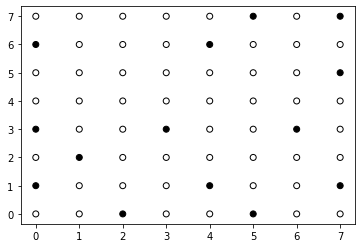

In [50]:
g = metroplis(np.zeros((8,8)), value, proposal, 10000)

In [51]:
print(np.sum(g) / len(g))

15.14938506149385


Text(0.5, 0, 'Iteration')

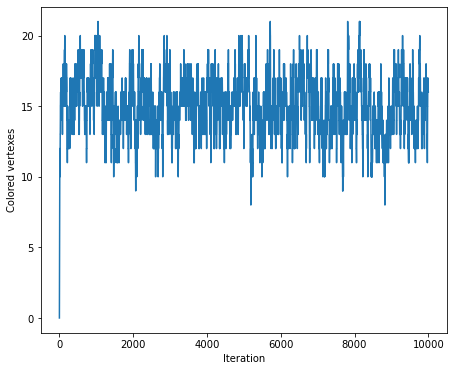

In [52]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,2)
plt.plot(post)
plt.ylabel("Colored vertexes", size=10)
plt.xlabel("Iteration", size=10)

In [53]:
from scipy import stats
def g_test(x, start=0.1, end=0.1):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

In [54]:
g_test(g[200:])

Ttest_indResult(statistic=9.882366246228681, pvalue=1.6556231760252236e-22)

Text(0.5, 1.0, 'colored vertexes distribution')

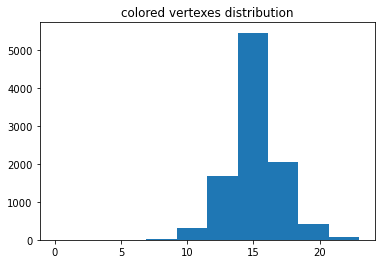

In [55]:
plt.hist(g)
plt.title("colored vertexes distribution")